# Introduction
&nbsp;  
This is a **demo notebook** for grounding line detection of Petermann glacier in Greenland using [ICESat-2 ATL06 data product](https://nsidc.org/data/atl06/versions/6) and bedrock topography from [BedMachine Greenland, Version 5](https://nsidc.org/data/idbmg4/versions/5).  

The validation grounding line dataset is from [Ciracì et al. (2023)](https://doi.org/10.1073/pnas.2220924120). Data is available on [Dryad](https://doi.org/10.7280/D1XT4G).


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import icepyx as ipx
import h5py
import geopandas as gpd
from pyproj import Transformer
import re
import glob
import ee
import geemap
import xarray as xr
from datetime import datetime
import json
import math
import warnings
from matplotlib.colors import ListedColormap

from shapely.geometry import shape, GeometryCollection
%matplotlib inline

## Get ICESat-2 ATL06 data using icepyx

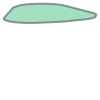

In [3]:
# Open a geojson of our area of interest
with open("../../glacier_gl_bboxes/hagen_brae_bbox.json") as f:
    features = json.load(f)["features"]

hagen_brae = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
hagen_brae

In [4]:
## Define ICESat-2 Data object to query
short_name = 'ATL06'
spatial_extent = list(hagen_brae.bounds)
date_range = ['2019-06-01','2019-06-06']
region = ipx.Query(short_name, spatial_extent, date_range)

In [44]:
hagen_brae.bounds

(-30.963519350291932, 80.95463838775972, -28.71932691701452, 81.42172212846359)

In [5]:
# Display if any data files, or granules, matched our search
region.avail_granules(ids=True)

[['ATL06_20190601054716_09770304_006_02.h5',
  'ATL06_20190605053856_10380304_006_02.h5']]

ATL06
['2019-06-01', '2019-06-06']
00:00:00
23:59:59
['No orbital parameters set']
['No orbital parameters set']
006


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
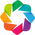

:Overlay
   .WMTS.I :WMTS   [Longitude,Latitude]
   .Path.I :Path   [Longitude,Latitude]

In [8]:
## Preview of query

print(region.product)
print(region.dates)
print(region.start_time)
print(region.end_time)
print(region.cycles)
print(region.tracks)
print(region.product_version)
region.visualize_spatial_extent()

In [9]:
## Get product summary of the query and the latest release version

region.product_summary_info()
print(region.latest_version())

title :  ATLAS/ICESat-2 L3A Land Ice Height V006
short_name :  ATL06
version_id :  006
time_start :  2018-10-14T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL06) provides geolocated, land-ice surface heights (above the WGS 84 ellipsoid, ITRF2014 reference frame), plus ancillary parameters that can be used to interpret and assess the quality of the height estimates. The data were acquired by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory.
orbit_parameters :  {}
006


In [10]:
## View the parameters that will be submitted in our query

region.CMRparams

{'temporal': '2019-06-01T00:00:00Z,2019-06-06T23:59:59Z',
 'bounding_box': '-30.963519350291932,80.95463838775972,-28.71932691701452,81.42172212846359'}

In [11]:
## Search for available granules and provide basic summary info about them

region.avail_granules()

{'Number of available granules': 2,
 'Average size of granules (MB)': 14.669398307800293,
 'Total size of all granules (MB)': 29.338796615600586}

In [12]:
## Get a list of granule IDs for the available granules

region.avail_granules(ids=True)

[['ATL06_20190601054716_09770304_006_02.h5',
  'ATL06_20190605053856_10380304_006_02.h5']]

In [13]:
## Order granules using Earthdata account

region.order_granules()

Total number of data order requests is  1  for  2  granules.
Data request  1  of  1  is submitting to NSIDC


Enter your Earthdata Login username:  bensonvb
Enter your Earthdata password:  ········


order ID:  5000005738364
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
NSIDC returned these messages
['Granule 267292562 contained no data within the spatial and/or temporal '
 'subset constraints to be processed']


In [14]:
## View a short list of order IDs

region.granules.orderIDs

['5000005738364']

In [17]:
## Download ICESat-2 data

path = 'Hagen_Brae/Granules'
region.download_granules(path)

Beginning download of zipped output...
Data request 5000005738364 of  1  order(s) is downloaded.
Download complete


In [29]:
## wget command for getting terminus position data from nsidc-0642, run this in Terminal

! wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies --no-check-certificate --auth-no-challenge=on -nH --cut-dirs=2 -r --reject "index.html*" -np -e robots=off https://n5eil01u.ecs.nsidc.org/MEASURES/NSIDC-0642.002/2019.02.03/


--2024-08-22 21:22:47--  https://n5eil01u.ecs.nsidc.org/MEASURES/NSIDC-0642.002/2019.02.03/
Resolving n5eil01u.ecs.nsidc.org (n5eil01u.ecs.nsidc.org)... 128.138.97.102
Connecting to n5eil01u.ecs.nsidc.org (n5eil01u.ecs.nsidc.org)|128.138.97.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=_JLuwMHxb2xX6NwYTb4dRA&response_type=code&redirect_uri=https%3A%2F%2Fn5eil01u.ecs.nsidc.org%2FOPS%2Fredirect&state=aHR0cHM6Ly9uNWVpbDAxdS5lY3MubnNpZGMub3JnL01FQVNVUkVTL05TSURDLTA2NDIuMDAyLzIwMTkuMDIuMDMv [following]
--2024-08-22 21:22:48--  https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=_JLuwMHxb2xX6NwYTb4dRA&response_type=code&redirect_uri=https%3A%2F%2Fn5eil01u.ecs.nsidc.org%2FOPS%2Fredirect&state=aHR0cHM6Ly9uNWVpbDAxdS5lY3MubnNpZGMub3JnL01FQVNVUkVTL05TSURDLTA2NDIuMDAyLzIwMTkuMDIuMDMv
Resolving urs.earthdata.nasa.gov (urs.earthdata.nasa.gov)... 198.118.243.33, 2001:4d0:241a:

## Read and visualize ICESat-2 ATL06 h5 data with other reference datasets

In [18]:
### Functions 

## Reprojection using pyproj
def reproj(X, Y, source_epsg, target_epsg):
    lon = []
    lat = []
    transformer = Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

    if len(X) == len(Y):
        for i in range(len(X)):
            lon1, lat1 = transformer.transform(X[i], Y[i])
            lon.append(lon1)
            lat.append(lat1)
    else:
        raise ValueError("X and Y must be of the same length.")
    return lon, lat


## Read ATL06 data and convert it to geodataframe
def read_atl06(f_name):
    f = h5py.File(f_name, "r")
    
    ## Following code come from ICESat-2 hackweek 2022 tutorial: https://github.com/ICESAT-2HackWeek/website2022/tree/main/book/tutorials/geospatial
    
    IS2_atl06_beams = []
    for key in f.keys():
        if key.startswith("gt"):
            # check if subsetted beam contains land ice data
            try:
                f[key]['land_ice_segments']['segment_id']
            except KeyError:
                pass
            else:
                IS2_atl06_beams.append(key)
            
    
    DEFAULT_GROUPS = []
    DEFAULT_GROUPS.append('bias_correction')
    DEFAULT_GROUPS.append('dem')
    DEFAULT_GROUPS.append('fit_statistics')
    DEFAULT_GROUPS.append('geophysical')
    DEFAULT_GROUPS.append('ground_track')
    
    groups=DEFAULT_GROUPS
    
    # output GeoDataFrame for ICESat-2 ATL06 variables
    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([],[]), crs="EPSG:4326")
    
    # read each input beam within the file
    for gtx in IS2_atl06_beams:
        # get each HDF5 variable in ICESat-2 land_ice_segments Group
        columns = {}
        for key,val in f[gtx]['land_ice_segments'].items():
            if isinstance(val, h5py.Dataset):
                if val.attrs.get('_FillValue'):
                    columns[key] = val[:].astype('f')
                    columns[key][val[:] == val.fillvalue] = np.nan
                else:
                    columns[key] = val[:]
            elif isinstance(val, h5py.Group) and (val.name.split('/')[-1] in groups):
                for k,v in val.items():
                    if v.attrs.get('_FillValue'):
                        columns[k] = v[:].astype('f')
                        columns[k][v[:] == v.fillvalue] = np.nan
                    else:
                        columns[k] = v[:]
        # number of segments
        n_seg = f[gtx]['land_ice_segments']['h_li'].size
        # fill value
        # generate derived variables
        columns['rgt'] = np.full((n_seg),f['orbit_info']['rgt'][0])
        columns['cycle_number'] = np.full((n_seg),f['orbit_info']['cycle_number'][0])
        BP,LR = re.findall(r'gt(\d)([lr])',gtx).pop()
        columns['BP'] = np.full((n_seg),int(BP))
        columns['LR'] = [LR]*n_seg
        beam_type = f[gtx].attrs['atlas_beam_type'].decode('utf-8')
        columns['beam_type'] = [beam_type]*n_seg
        columns['spot'] = np.full((n_seg),f[gtx].attrs['atlas_spot_number'])
        # convert from dictionary to geodataframe
        delta_time = (columns['delta_time']*1e9).astype('timedelta64[ns]')
        atlas_sdp_epoch = np.datetime64('2018-01-01T00:00:00Z')
        columns['time'] = gpd.pd.to_datetime(atlas_sdp_epoch + delta_time)
        # generate geometry column
        geometry = gpd.points_from_xy(columns['longitude'], columns['latitude'])
        del columns['longitude']
        del columns['latitude']
        # create Pandas DataFrame object
        df = gpd.pd.DataFrame(columns)
        # append to GeoDataFrame
        gdf = pd.concat([gdf, gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")])
    
    # Reproject to polar stereographic
    coords = np.stack(gdf.geometry.apply(lambda x: np.array(x.coords).ravel()))
    gdf["x"], gdf["y"] = reproj(coords[:, 0], coords[:, 1], "epsg:4326", "epsg:3413")
    # gdf["lon"] = coords[:, 0]
    # gdf["lat"] = coords[:, 1]

    return gdf


In [30]:
f_name = "Hagen_Brae/Granules/processed_ATL06_20190601054716_09770304_006_02.h5"
# ! h5ls {f_name}/gt2l/land_ice_segments

## Use year_oi as an example and read in all the ATL06 data in the defined date and spatial range

f_name_list = glob.glob("Hagen_Brae/Granules/processed_ATL06*.h5")
year_oi = "2019"

gdf_dic = {}
for f_name in f_name_list[:10]:
    date_str = f_name.split("/")[-1].split("_")[2][:8]
    if date_str[:4]==year_oi:
        gdf = read_atl06(f_name) # Read ATL06 data and convert it to geodataframe
        gdf_dic[date_str] = gdf[["geometry", "geoid_h", "h_li", "h_li_sigma", "cycle_number", "BP", "LR", "beam_type", "time", "x", "y"]] # Subset using a list of interested parameters

In [34]:
f_name_list

['Hagen_Brae/Granules/processed_ATL06_20190601054716_09770304_006_02.h5']

In [33]:
## An example dataframe for a granule

gdf_dic["20190601"]

,geometry,geoid_h,h_li,h_li_sigma,cycle_number,BP,LR,beam_type,time,x,y
0,POINT (-30.7303 80.96359),34.843578,NaN,NaN,3.0,1.0,l,strong,2019-06-01 05:47:31.857818856,241764.420839,-950579.595430
1,POINT (-30.73174 80.96482),34.836548,1718.235474,1.149480,3.0,1.0,l,strong,2019-06-01 05:47:31.890637904,241707.436737,-950455.473326
2,POINT (-30.7335 80.96568),34.831570,NaN,NaN,3.0,1.0,l,strong,2019-06-01 05:47:31.904717296,241655.233822,-950372.269886
3,POINT (-30.73459 80.96638),34.827549,NaN,NaN,3.0,1.0,l,strong,2019-06-01 05:47:31.915980384,241618.355356,-950303.416468
4,POINT (-30.73643 80.9676),34.820545,NaN,NaN,3.0,1.0,l,strong,2019-06-01 05:47:31.935703576,241555.125199,-950182.232997
...,...,...,...,...,...,...,...,...,...,...,...
118,POINT (-30.95353 81.35479),34.265671,NaN,NaN,3.0,3.0,r,weak,2019-06-01 05:47:38.290913736,227714.649165,-910167.845381
119,POINT (-30.95381 81.35496),34.265545,NaN,NaN,3.0,3.0,r,weak,2019-06-01 05:47:38.293738976,227705.470907,-910150.624868
120,POINT (-30.9541 81.35514),34.265419,NaN,NaN,3.0,3.0,r,weak,2019-06-01 05:47:38.296566696,227696.282771,-910133.409384
121,POINT (-30.95439 81.35531),34.265305,NaN,NaN,3.0,3.0,r,weak,2019-06-01 05:47:38.299410824,227687.101418,-910116.190439


In [10]:
## Read in NSIDC-0642 terminus change data

tp_2019_fn = "data/Terminus_change/2019.02.03/termini_2018_2019_v02.0.shp"
tp_2019 = gpd.read_file(tp_2019_fn)

# Petermann Glacier_ID: 93
# Projection: epsg 3413 polar stereographic

tp_petermann_2019 = tp_2019[tp_2019["Glacier_ID"] == 93]

tp_petermann_2019

,Image_ID,Sensor,Glacier_ID,Quality_Fl,SourceDate,geometry
108,SEN1_NSIDC_0723_V4_20190203_20190208,SEN1,93,0,2019-02-07,"LINESTRING (-283406.906 -939718.560, -283152.9..."


In [118]:
## Use Google Earth Engine to get Sentinel 2 image near the date of 20190502

# Trigger the authentication flow
ee.Authenticate()
 
# Initialize the library
ee.Initialize()

# Define are of interest using polygon (epsg 4326)
# aoi = ee.Geometry.Polygon([[-58, 81], [-58, 80.8], [-60, 80.2], [-61, 81], [-58.5, 81]])

gdf = gpd.read_file("../../glacier_gl_bboxes/hagen_brae_bbox.json")
geom = gdf.geometry.iloc[0]
coords = [list(poly.exterior.coords) for poly in geom] if geom.geom_type == 'MultiPolygon' else [list(geom.exterior.coords)]
aoi = ee.Geometry.Polygon(coords)



# aoi = ee.Geometry.Polygon([[-30.963519350291932, 80.95463838775972],[-30.963519350291932,81.42172212846359],[-28.71932691701452,80.95463838775972], [-28.71932691701452, 81.42172212846359]])

# image_col = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(aoi).filterDate(ee.Date('2019-06-01'), ee.Date('2019-06-30')).toList(999) # Get sentinel 2 image in May 2019 in area of interest (aoi)
image_col = ee.ImageCollection('COPERNICUS/S2_SR').filterBounds(aoi).filterDate(ee.Date('2019-06-01'), ee.Date('2019-06-30')) # Get sentinel 2 image in May 2019 in area of interest (aoi)
filtered = image_col.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

# image = ee.Image(ee.List(image_col).get(0)) # get the first one in the list

image = filtered.mosaic()


In [108]:
gdf

,geometry
0,"POLYGON ((-30.20302 80.95625, -30.26324 80.954..."


In [119]:
## Visualize terminus position (2019-02-07), background Sentinel2 image (2019-05-01), with ICESat-2 ground track locations (2019-02-20 to 2019-12-31)

# Define the visualization parameters.
image_viz_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 65535,
    'gamma': [3],
}

# ATL06 ground track parameter
atl06_params = {
    'color': 'green',
}

# Terminus position ground track parameter
tp_params = {
    'color': 'red',
}

# Define a map
m_Hagen_Brae = geemap.Map(center=[81.17, -30.66], zoom=7) # EPSG 4326

# Add the Sentinel 2 image layer to the map and display it.
m_Hagen_Brae.add_layer(image, image_viz_params, 'Sentinel2 20190601')

# Add ATL06 groundtracks (downsampled for visualization)
atl_06_pts = geemap.geopandas_to_ee(gdf_dic["20190601"].iloc[::20, :])
m_Hagen_Brae.addLayer(atl_06_pts, atl06_params, "ATL06 20190601")

# Add terminus position data to the map
#tp_petermann_2019_ee = geemap.geopandas_to_ee(tp_petermann_2019)
#m_petermann.addLayer(tp_petermann_2019_ee, tp_params, "Terminus position on "+tp_petermann_2019["SourceDate"].values[0])

# Add layer control
m_Hagen_Brae.addLayerControl(position='topright')
display(m_Hagen_Brae)

Map(center=[81.17, -30.66], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

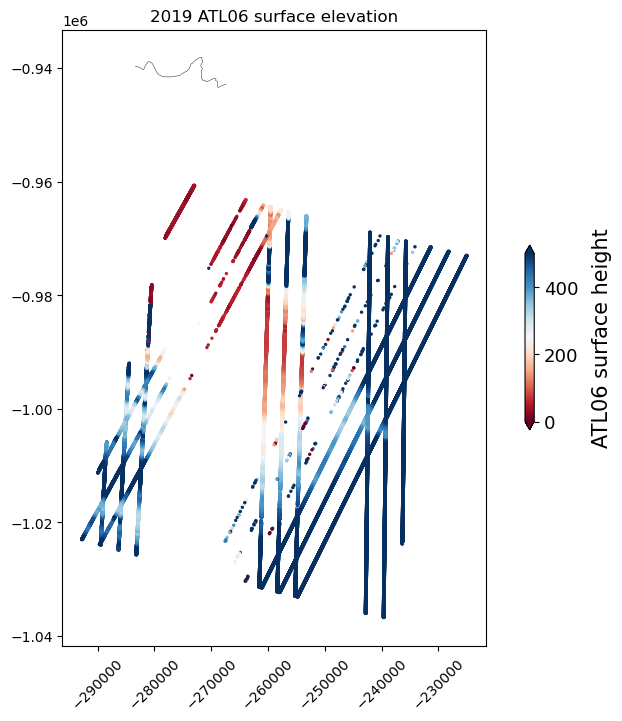

In [17]:
## Plot surface elevation from ATL06 in 2019 together

fig, ax = plt.subplots(figsize = (10, 8))
tp_petermann_2019.plot(ax=ax, color = 'k', linewidth = 0.3, aspect = 1) # reference terminus position in 2021

for date, gdf in gdf_dic.items():
    if date[:4]==year_oi:
    # if date == "20190502":
        im = ax.scatter(gdf["x"], gdf["y"], c = gdf["h_li"].values, cmap = 'RdBu', norm=mpl.colors.Normalize(vmin=0, vmax=500), s = 2)

ax.set_aspect('equal')
ax.set_title(year_oi+" ATL06 surface elevation")
ax.tick_params(axis='x', labelrotation=45)

cbar = fig.colorbar(im, ax=ax, shrink=0.3, extend='both')
cbar.ax.tick_params(labelsize=13) 
cbar.set_label('ATL06 surface height', rotation=90, fontsize=15, labelpad = 10)

plt.show()


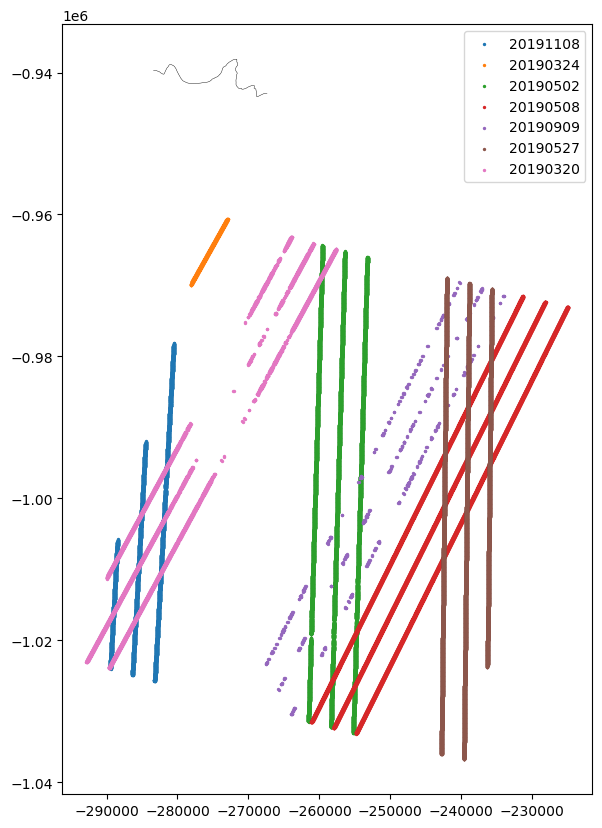

In [18]:
## Plot ATL06 ground tracks in 2019 together

fig, ax = plt.subplots(figsize = (10, 10))
tp_petermann_2019.plot(ax=ax, color = 'k', linewidth = 0.3, aspect = 1) # reference terminus position in 2021

for date, gdf in gdf_dic.items():
    if date[:4]=="2019":
    # if date == "20190502":
        im = ax.scatter(gdf["x"], gdf["y"], s = 2, label = date)
        
ax.set_aspect('equal')
ax.legend(loc = "best")

plt.show()


## Find grounding line using floatation height

In [20]:
## wget command to get bedmachine Greenland v5 data, run this in Terminal

# wget --load-cookies ~/.urs_cookies --save-cookies ~/.urs_cookies --keep-session-cookies --no-check-certificate --auth-no-challenge=on -nH --cut-dirs=1 -r --reject "index.html*" -np -e robots=off https://n5eil01u.ecs.nsidc.org/ICEBRIDGE/IDBMG4.005/1993.01.01/

In [22]:
## Read in bedmachine data

Bed_ele_f = "data/BedmMachine_Greenland_v5/BedMachineGreenland-v5.nc"
Bed_ele = xr.open_dataset(Bed_ele_f)
Bed_ele

<xarray.Dataset> Size: 4GB
Dimensions:    (x: 10218, y: 18346)
Coordinates:
  * x          (x) int32 41kB -652925 -652775 -652625 ... 879325 879475 879625
  * y          (y) int32 73kB -632675 -632825 -632975 ... -3384275 -3384425
Data variables:
    mapping    |S1 1B ...
    mask       (y, x) int8 187MB ...
    surface    (y, x) float32 750MB ...
    thickness  (y, x) float32 750MB ...
    bed        (y, x) float32 750MB ...
    errbed     (y, x) float32 750MB ...
    source     (y, x) int8 187MB ...
    dataid     (y, x) int8 187MB ...
    geoid      (y, x) int16 375MB ...
Attributes: (12/16)
    Conventions:                 CF-1.7
    Title:                       BedMachine Greenland
    Author:                      Mathieu Morlighem
    version:                     28-Jul-2022 (v5.5)
    nx:                          10218.0
    ny:                          18346.0
    ...                          ...
    xmin:                        -652925
    ymax:                        -632675
    spacing:                     150
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2017), BedMachine v3: ...

In [23]:
## Original bedmachine image is too big for the small server I am using. 
## Subset bedmachine using the bounding box of ATL06 data and get the relative position of ATL06 ground tracks to the subset of bedmachine data

# find spatial range of atl06 data
x = []
y = []
for value in gdf_dic.values():
    x.extend(value["x"].values)
    y.extend(value["y"].values)

x = np.asarray(x)
y = np.asarray(y)

x_min = np.nanmin(x)
x_max = np.nanmax(x)
y_min = np.nanmin(y)
y_max = np.nanmax(y)

# create masks to subset bedmachine data
mask_y = (Bed_ele["y"].values > y_min) & (Bed_ele["y"].values < y_max)
mask_x = (Bed_ele["x"].values > x_min) & (Bed_ele["x"].values < x_max)
bed_subset = Bed_ele["bed"].values[mask_y][:,mask_x]

x_subset = Bed_ele["x"].values[mask_x]
y_subset = Bed_ele["y"].values[mask_y]

# Get the relative position of ATL06 ground tracks relative to the subset of bedmachine data
res_BM = 150 # horizontal resolution of bedmachine: 150 m
id_atl06 = "20190502"
x_atl06 = gdf_dic[id_atl06]["x"].values # use 20190502 as an example
y_atl06 = gdf_dic[id_atl06]["y"].values

ind_x_l = np.rint((x_atl06 - np.min(x_subset))/res_BM).astype(int)
ind_y_l = np.abs(np.rint((y_atl06 - np.max(y_subset))/res_BM).astype(int))


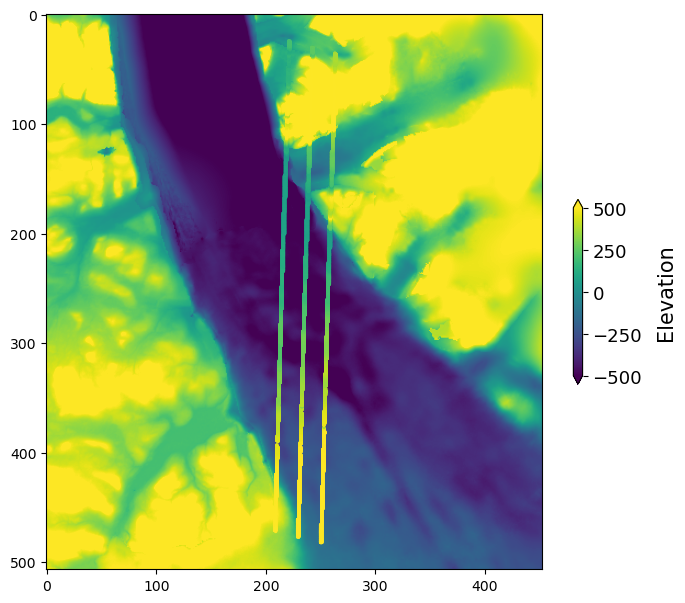

In [24]:
fig, ax = plt.subplots(figsize = (8, 8))

cmap = 'viridis'
norm=mpl.colors.Normalize(vmin=-500, vmax=500)

im = ax.imshow(bed_subset, cmap = cmap, norm = norm)
ax.scatter(ind_x_l, ind_y_l, c = gdf_dic[id_atl06]["h_li"].values, cmap = cmap, norm = norm, s = 2)


ax.set_aspect('equal')
cbar = fig.colorbar(im, ax=ax, shrink=0.3, extend='both')
cbar.ax.tick_params(labelsize=13) 
cbar.set_label('Elevation', rotation=90, fontsize=15, labelpad = 10)
plt.show()

**Equation used to calculate floatation height**

Based on the Archimedes' principle:

```{math}
:label: my_label
\rho_{ice} * H_{ice} = \rho_{water} * H_{water}\\
\rho_{ice} * (H_{water} + H_{floatation}) = \rho_{water} * H_{water}
```

Assuming sea water density of 1025 $kg/m^{3}$ and ice density of 917 $kg/m^{3}$, we have:

```{math}
:label: my_label
H_{floatation} \~= 108 / 917 * H_{water}
```

In [34]:
## Get profile of bed elevation along ATL06 ground tracks and use floatation height to get grounded/floating masks

ele_profile = bed_subset[ind_y_l, ind_x_l]
msk_bsl = ele_profile < 0 # Mask of bed below sea-level
fh = np.abs(ele_profile[msk_bsl]*108/917)
msk_grounded = (gdf_dic[id_atl06]["h_li"].values[msk_bsl] > fh) # Try to relax the threshold?

Date1                                                  190414
Date2                                                  190420
Date3                                                  190420
Date4                                                  190426
Orbit1                                                 015802
Orbit2                                                 026873
Orbit3                                                 026873
Orbit4                                                 015977
time                                               2019-04-14
f_year                                            2019.282192
year                                                     2019
month                                                       4
day                                                        14
Sensor                                               Sentinel
geometry    LINESTRING (-266758.7611320538 -997196.3791989...
date                                               2019-04-14
Name: 80

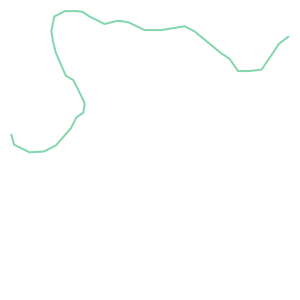

In [35]:
## Validation dataset
GL_Ciraci2023_f = "data/GL_Ciraci2023/petermann_grounding_lines_1992-2022.shp"
GL_Ciraci2023 = gpd.read_file(GL_Ciraci2023_f)

time_dt = []
for time_str in GL_Ciraci2023["time"].values:
    time_dt.append(datetime.strptime(time_str, '%Y-%m-%d').date())
GL_Ciraci2023["date"] = np.asarray(time_dt)

# Find grounding line on the nearest date
date_atl06 = datetime.strptime(id_atl06, '%Y%m%d').date()
id_nearest = np.argmin(np.abs(GL_Ciraci2023["date"].values - date_atl06))
print(GL_Ciraci2023.iloc[id_nearest, :])
GL_Ciraci2023.iloc[id_nearest, :]["geometry"]


In [36]:
# Get the relative position of validation grounding line data relative to the subset of bedmachine data

x_GL = GL_Ciraci2023.iloc[id_nearest, :]["geometry"].coords.xy[0]
y_GL = GL_Ciraci2023.iloc[id_nearest, :]["geometry"].coords.xy[1]

ind_x_GL_l = np.rint((x_GL - np.min(x_subset))/res_BM).astype(int)
ind_y_GL_l = np.abs(np.rint((y_GL - np.max(y_subset))/res_BM).astype(int))

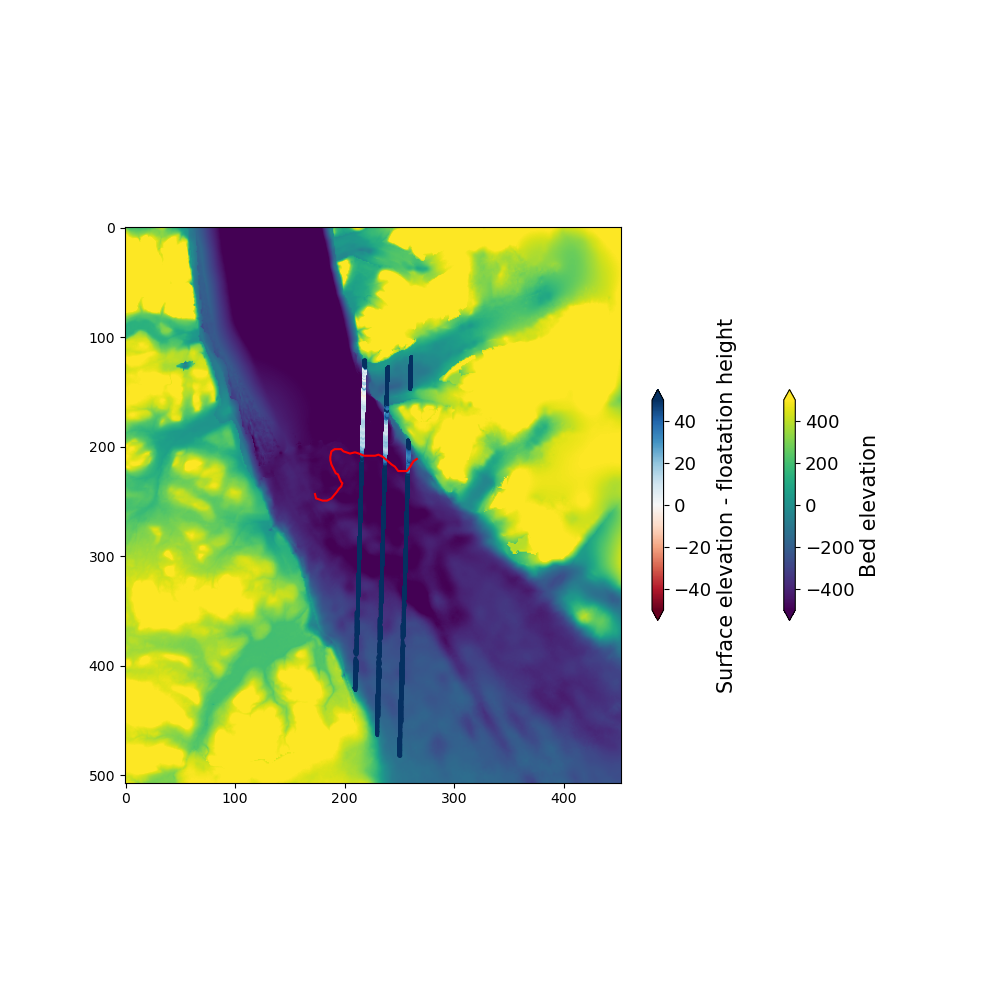

In [37]:
## Plot the difference between ATL06 elevaion and floatation height with validationn grounding line position

fig, ax = plt.subplots(figsize = (10, 10))

cmap = 'RdBu' # use a diverging color scheme
norm=mpl.colors.Normalize(vmin=-50, vmax=50)

im = ax.imshow(bed_subset, cmap = "viridis", norm = mpl.colors.Normalize(vmin=-500, vmax=500))
im1 = ax.scatter(ind_x_l[msk_bsl], ind_y_l[msk_bsl], c = gdf_dic[id_atl06]["h_li"].values[msk_bsl] - fh, cmap = cmap, norm = norm, s = 2)
ax.plot(ind_x_GL_l, ind_y_GL_l, c = "red")

# Colorbar for bed topography
cbar = fig.colorbar(im, ax=ax, shrink=0.3, extend='both')
cbar.ax.tick_params(labelsize=13) 
cbar.set_label('Bed elevation', rotation=90, fontsize=15)

# Colorbar for ATL06 elevaion - floatation height
cbar = fig.colorbar(im1, ax=ax, shrink=0.3, extend='both')
cbar.ax.tick_params(labelsize=13) 
cbar.set_label('Surface elevation - floatation height', rotation=90, fontsize=15)

ax.set_aspect('equal')
plt.show()

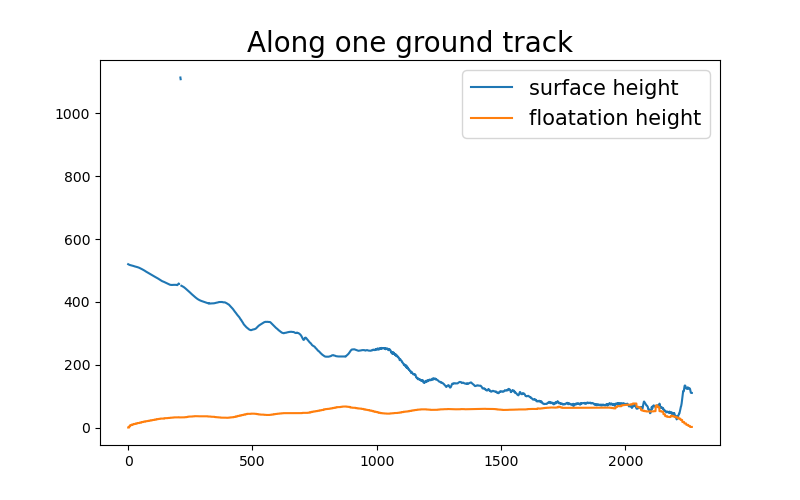

In [38]:
%matplotlib widget

## Plot surface profile long one ground track

fig, ax = plt.subplots(figsize = (8, 5))

gdf_bbsl = gdf_dic[id_atl06][msk_bsl]
mask_1track = (gdf_bbsl["BP"] == 1.0) & (gdf_bbsl["LR"] == "l") # 1l
gdf_bbsl_1track = gdf_bbsl[mask_1track]

ax.plot(gdf_bbsl_1track["h_li"].values, label = "surface height")
ax.plot(fh[mask_1track], label = "floatation height")

ax.set_title("Along one ground track", fontsize = 20)
ax.legend(fontsize = 15)
plt.show()

**Further work**:

1. "h_li" in ATL06 data file is ellipsoidal height, need to correct for geoid height
2. Relax floatation height threshold